In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/ds_salaries.csv')

In [5]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [11]:
data.shape

(3755, 11)

In [12]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [13]:
print(data.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


<Axes: title={'center': 'Average Data Science Salaries by year'}, xlabel='Year', ylabel='Mean Salary'>

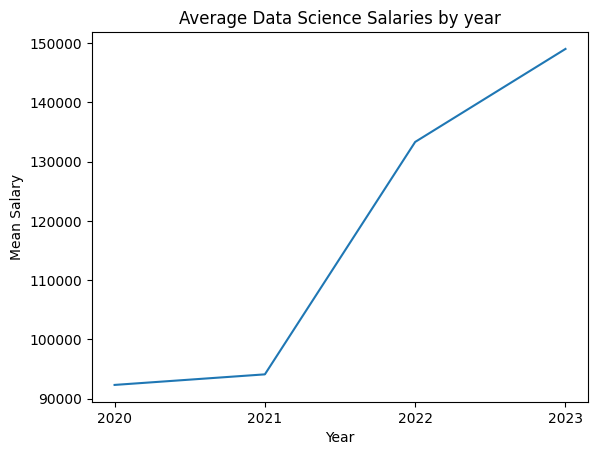

In [18]:
meanYearlySalary = np.array(data['salary_in_usd'].groupby(data['work_year']).mean())

plt.xlabel('Year')
plt.ylabel('Mean Salary')
plt.title("Average Data Science Salaries by year")
sns.lineplot(x=['2020', '2021', '2022', '2023'], y=meanYearlySalary)

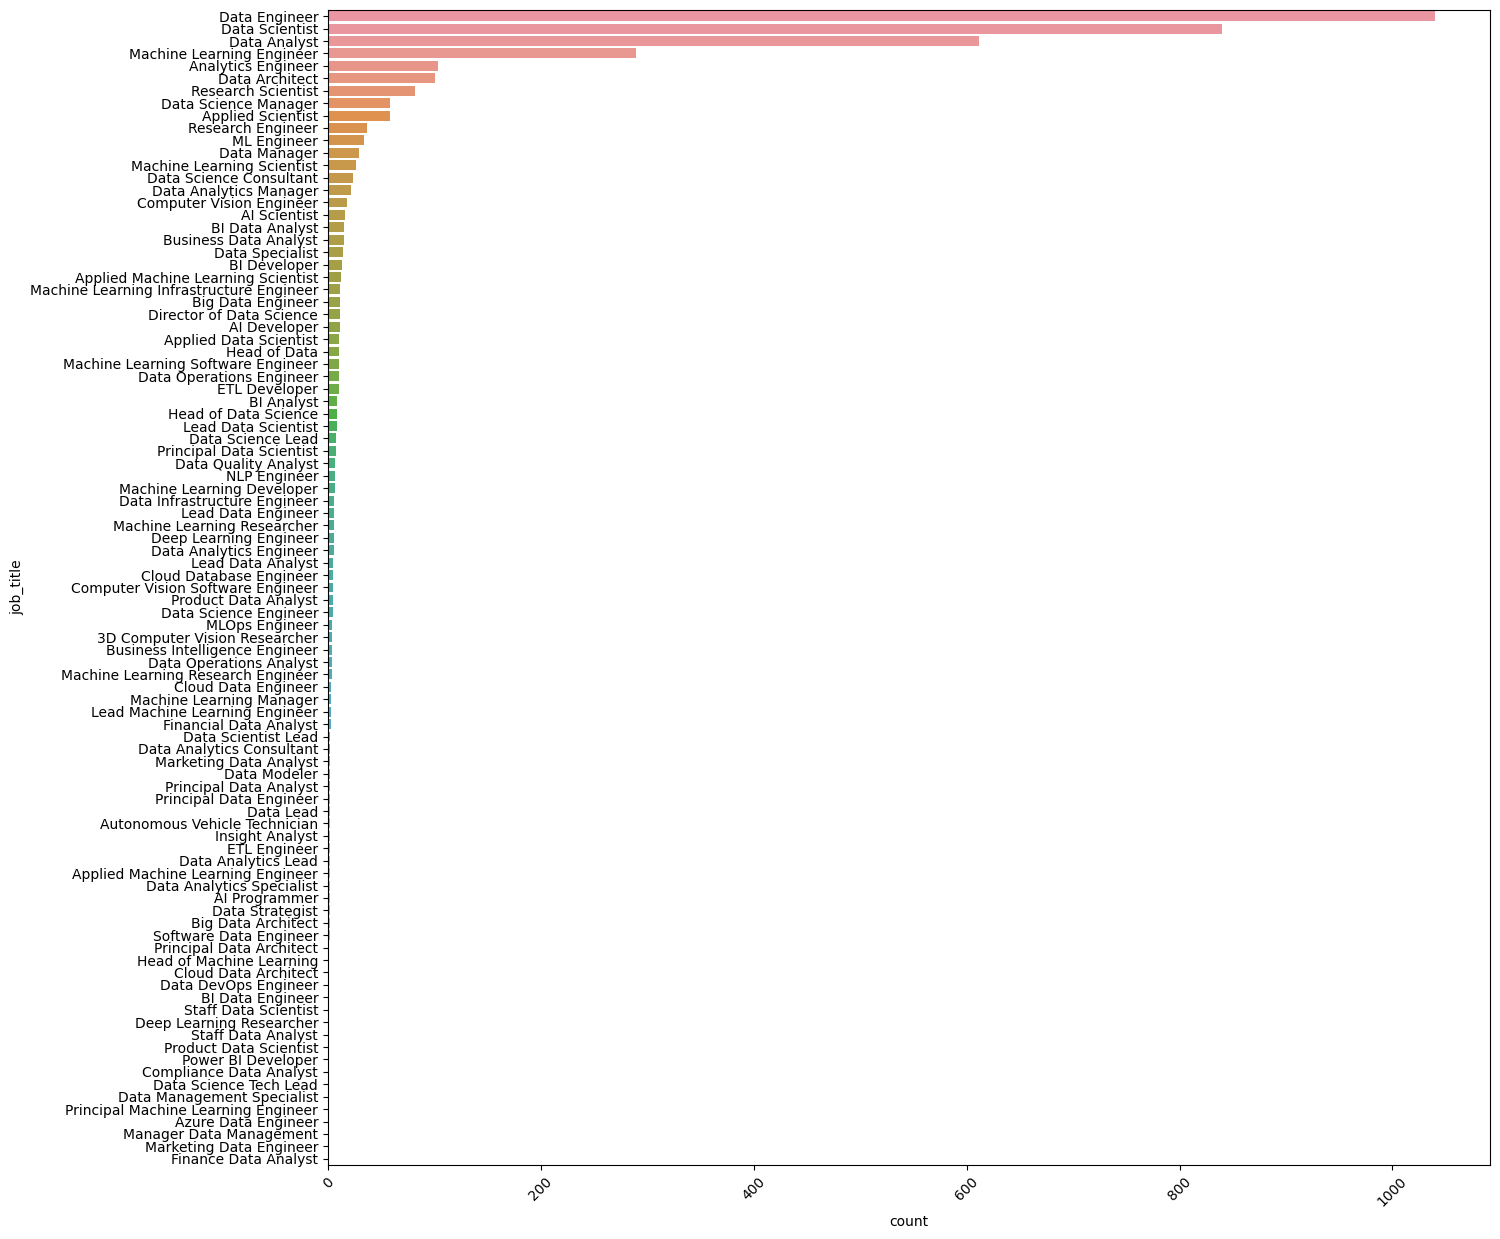

In [19]:
plt.figure(figsize=(15,15))
sns.countplot(y=data["job_title"] , data = data , order = data["job_title"].value_counts().index)
plt.xticks(rotation = 45)
plt.show()

In [20]:
avg_salary_by_job_title = data.groupby('job_title')['salary'].mean()
avg_salary_by_job_title = avg_salary_by_job_title.map(int)
print(avg_salary_by_job_title.sort_values(ascending=False))

job_title
Head of Machine Learning          6000000
Principal Data Architect          3000000
Lead Machine Learning Engineer    2548666
Lead Data Scientist                928485
Data Analytics Lead                922500
                                   ...   
Insight Analyst                     38500
Compliance Data Analyst             30000
Autonomous Vehicle Technician       26277
Staff Data Analyst                  15000
Product Data Scientist               8000
Name: salary, Length: 93, dtype: int64


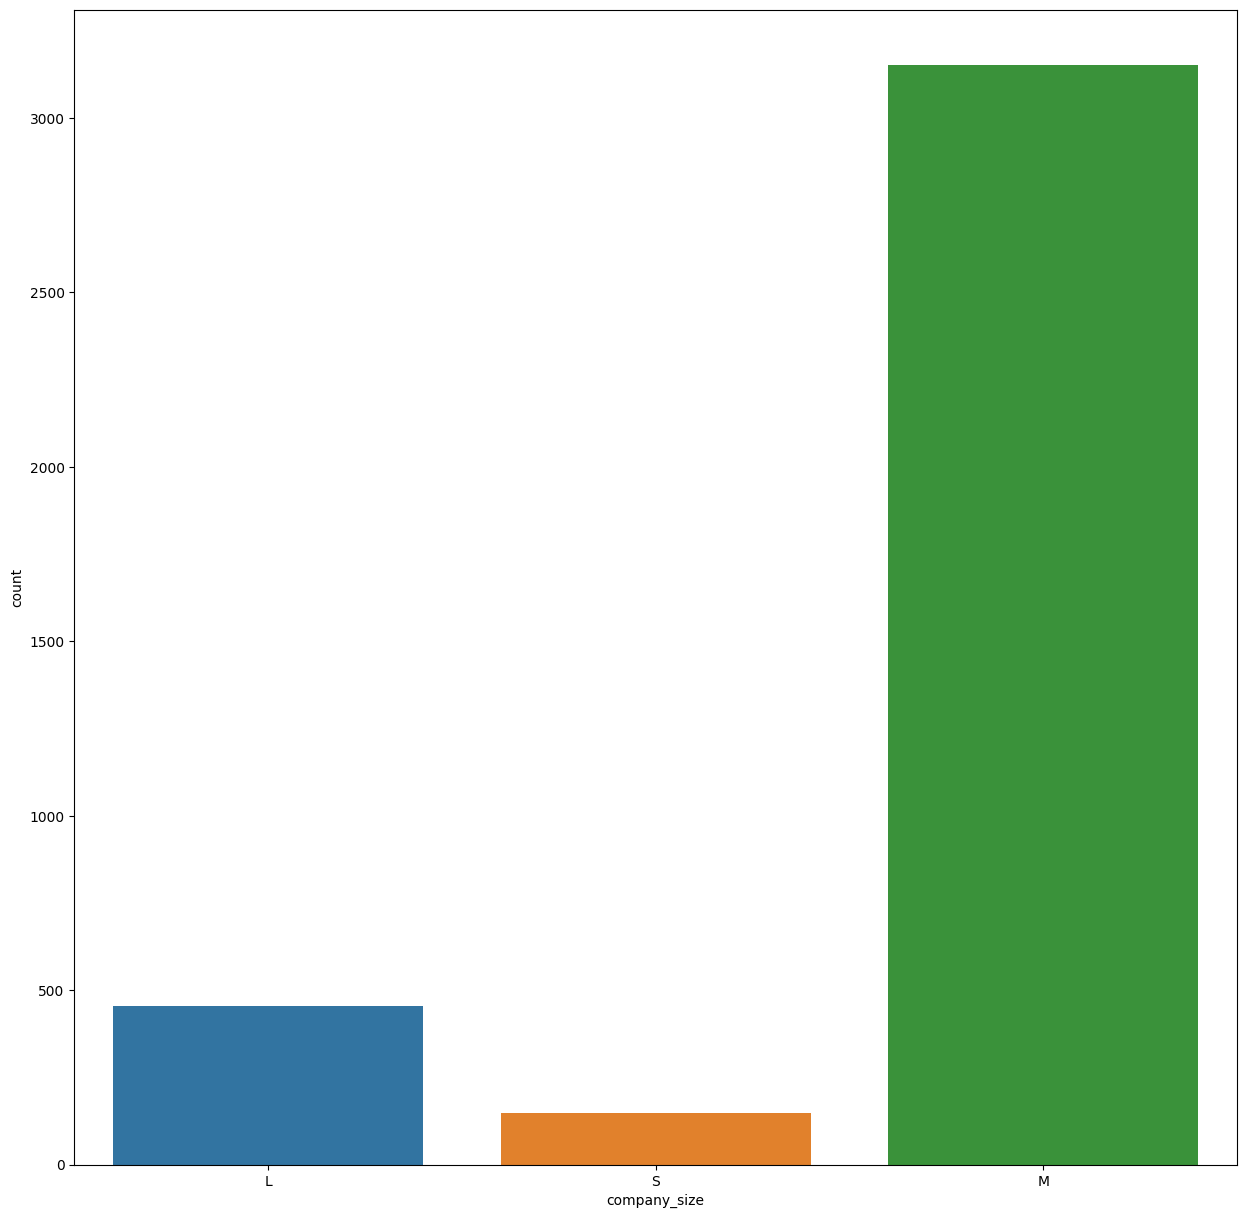

In [21]:
plt.figure(figsize=(15,15))
sns.countplot(x=data["company_size"] , data = data)
plt.show()

In [23]:
data.job_title.value_counts()[:10]

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

<Axes: xlabel='salary_in_usd', ylabel='Count'>

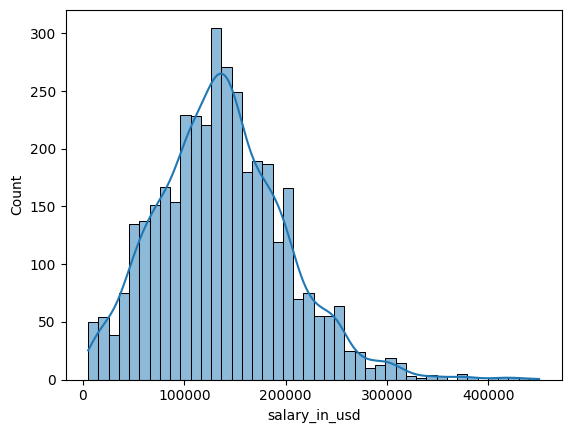

In [24]:
sns.histplot(data.salary_in_usd,kde=True)

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

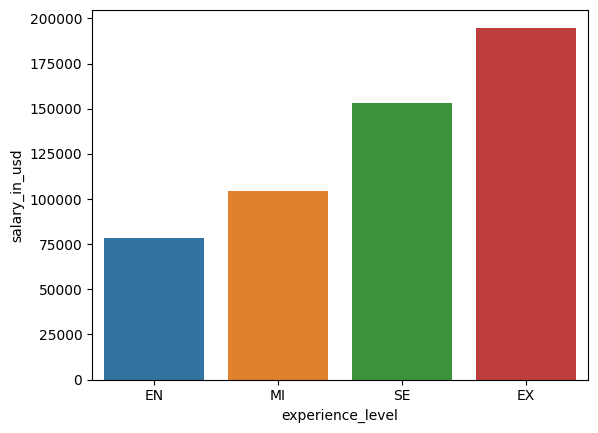

In [27]:
sal_by_exp = data.salary_in_usd.groupby(data.experience_level).mean()
sal_by_exp.sort_values(inplace=True)
sns.barplot(x=sal_by_exp.index,y=sal_by_exp)

[Text(0, 0, 'Data Science Tech Lead'),
 Text(1, 0, 'Cloud Data Architect'),
 Text(2, 0, 'Data Lead'),
 Text(3, 0, 'Data Analytics Lead'),
 Text(4, 0, 'Principal Data Scientist'),
 Text(5, 0, 'Director of Data Science'),
 Text(6, 0, 'Principal Data Engineer'),
 Text(7, 0, 'Machine Learning Software Engineer'),
 Text(8, 0, 'Data Science Manager'),
 Text(9, 0, 'Applied Scientist')]

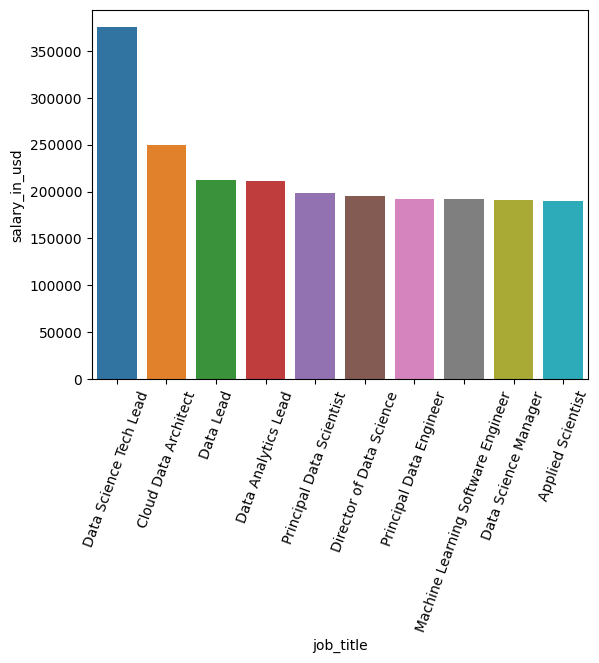

In [6]:
sal_by_title = data.salary_in_usd.groupby(data.job_title).mean()
sal_by_title.sort_values(inplace=True,ascending=False)
plot = sns.barplot(x=sal_by_title[:10].index,y=sal_by_title[:10])
plot.set_xticklabels(labels=sal_by_title[:10].index,rotation = 70)